<a href="https://colab.research.google.com/github/binit-13/Machine-Learning-Notes/blob/main/logisticR_perceptron_Softmax.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

from sklearn.datasets import make_classification
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

import seaborn as sns
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.metrics import accuracy_score, confusion_matrix,precision_score, recall_score


In [ ]:
X,y = make_classification(n_samples=100, n_features=2, n_redundant=0, n_informative=1,n_classes=2 , hypercube=False, n_clusters_per_class=1,random_state=41,class_sep=30)
#class_sep le point haru ma difference 10 le close 30 le far

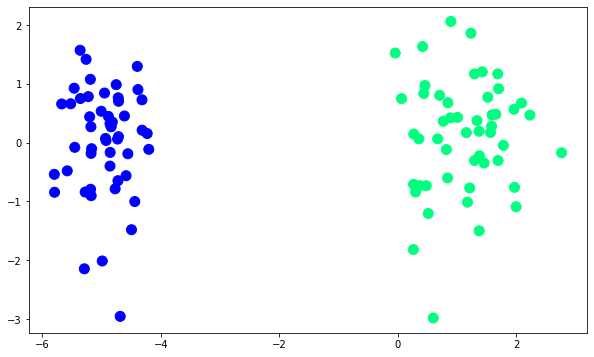

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap = 'winter',s=100)

In [ ]:
def step(num):
  return 1 if num > 0 else 0

def perceptron(X,y):

  X = np.insert(X,0,1, axis=1)
  weights = np.ones(X.shape[1])
  lr = 0.1

  for i in range(500):
    j= np.random.randint(0,100)
    y_hat = step(np.dot(X[j],weights)) #step function gives 1 if greater than 0, if less than 0 that we created
    weights = weights + lr*(y[j]-y_hat)*X[j]

  return weights[0],weights[1:]

In [ ]:
intercet, coeff = perceptron(X,y)

In [ ]:
m = -coeff[0]/coeff[1]
b = intercet/coeff[1]

In [ ]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + intercet


(-3.0, 2.0)

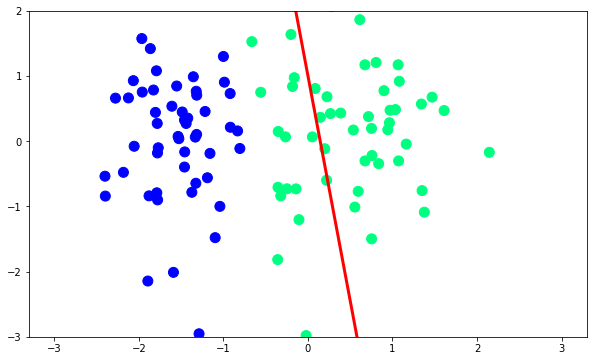

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red', linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y, cmap='winter',s=100)
plt.ylim(-3,2)

In [ ]:
lr = LogisticRegression(penalty='none',solver='sag')

In [ ]:
lr.fit(X,y)


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(penalty='none', solver='sag')

In [ ]:
lr.coef_

array([[3.56908044, 0.14420061]])

In [ ]:
lr.intercept_

array([4.32271947])

In [ ]:
# GDR Regression by loss function minimization, here no use of regularization also sigmoid func is used.
def sigmoid(z):
  return 1/(1+np.exp(-z))


def GDLR(X,y):
  X = np.insert(X, 0,1,axis=1)
  weights = np.ones(X.shape[1])
  lr = 0.5

  for i in range(2500):
    y_hat = sigmoid(np.dot(X, weights))
    weights = weights + lr*(np.dot((y-y_hat),X)/X.shape[0])

  return weights[1:], weights[0]

In [ ]:
coefff, intercept = GDLR(X,y)

In [ ]:
coefff, intercept

(array([3.23213874, 0.1201336 ]), 4.515959489477167)

Multinomial Logistic Regression i.e Softmax function



In [ ]:
df = sns.load_dataset('iris')

In [ ]:
encoder = LabelEncoder()
df['species'] = encoder.fit_transform(df['species'])

In [ ]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
df = df[['sepal_length','petal_length','species']]

In [ ]:
df.sample(20)

,sepal_length,petal_length,species
43,5.0,1.6,0
91,6.1,4.6,1
132,6.4,5.6,2
47,4.6,1.4,0
109,7.2,6.1,2
115,6.4,5.3,2
35,5.0,1.2,0
136,6.3,5.6,2
106,4.9,4.5,2
78,6.0,4.5,1


In [ ]:
A = df.iloc[:,0:2]
B = df.iloc[:,-1]

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(A, B, test_size=0.2, random_state=2)

In [ ]:
clf = LogisticRegression(multi_class= 'multinomial')

In [ ]:
clf.fit(X_train, Y_train)

LogisticRegression(multi_class='multinomial')

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
print(accuracy_score(Y_test, y_pred))

0.9666666666666667


In [ ]:
pd.DataFrame(confusion_matrix(Y_test, y_pred))

,0,1,2
0,14,0,0
1,0,7,1
2,0,0,8


In [ ]:
# custom prediction
query = np.array([[3.4,2.7]])
clf.predict_proba(query) #gives probability of 3 species of flower of happening since 0 has highest probability hence 0 is predicted

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[7.25957888e-01, 2.73627865e-01, 4.14246954e-04]])

In [ ]:
!pip install mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import mlxtend.plotting as mp

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


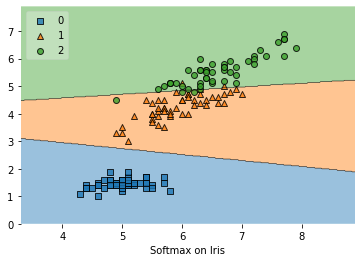

In [ ]:
mp.plot_decision_regions(A.values, B.values, clf, legend=2)

plt.xlabel('sepal_length [cm]')
plt.xlabel('petal_length [cm]')
plt.xlabel('Softmax on Iris')

plt.show()